In [1]:
import numpy as np
import sklearn
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [2]:
dtypes = {
    'MachineIdentifier':                                    'category',
    'ProductName':                                          'category',
    'EngineVersion':                                        'category',
    'AppVersion':                                           'category',
    'AvSigVersion':                                         'category',
    'IsBeta':                                               'int8',
    'RtpStateBitfield':                                     'float16',
    'IsSxsPassiveMode':                                     'int8',
    'DefaultBrowsersIdentifier':                            'float32',  # was 'float16'
    'AVProductStatesIdentifier':                            'float32',
    'AVProductsInstalled':                                  'float16',
    'AVProductsEnabled':                                    'float16',
    'HasTpm':                                               'int8',
    'CountryIdentifier':                                    'int16',
    'CityIdentifier':                                       'float32',
    'OrganizationIdentifier':                               'float16',
    'GeoNameIdentifier':                                    'float16',
    'LocaleEnglishNameIdentifier':                          'int16',  # was 'int8'
    'Platform':                                             'category',
    'Processor':                                            'category',
    'OsVer':                                                'category',
    'OsBuild':                                              'int16',
    'OsSuite':                                              'int16',
    'OsPlatformSubRelease':                                 'category',
    'OsBuildLab':                                           'category',
    'SkuEdition':                                           'category',
    'IsProtected':                                          'float16',
    'AutoSampleOptIn':                                      'int8',
    'PuaMode':                                              'category',
    'SMode':                                                'float16',
    'IeVerIdentifier':                                      'float16',
    'SmartScreen':                                          'category',
    'Firewall':                                             'float16',
    'UacLuaenable':                                         'float64', # was 'float32'
    'Census_MDC2FormFactor':                                'category',
    'Census_DeviceFamily':                                  'category',
    'Census_OEMNameIdentifier':                             'float32', # was 'float16'
    'Census_OEMModelIdentifier':                            'float32',
    'Census_ProcessorCoreCount':                            'float16',
    'Census_ProcessorManufacturerIdentifier':               'float16',
    'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
    'Census_ProcessorClass':                                'category',
    'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
    'Census_PrimaryDiskTypeName':                           'category',
    'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
    'Census_HasOpticalDiskDrive':                           'int8',
    'Census_TotalPhysicalRAM':                              'float32',
    'Census_ChassisTypeName':                               'category',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
    'Census_PowerPlatformRoleName':                         'category',
    'Census_InternalBatteryType':                           'category',
    'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
    'Census_OSVersion':                                     'category',
    'Census_OSArchitecture':                                'category',
    'Census_OSBranch':                                      'category',
    'Census_OSBuildNumber':                                 'int16',
    'Census_OSBuildRevision':                               'int32',
    'Census_OSEdition':                                     'category',
    'Census_OSSkuName':                                     'category',
    'Census_OSInstallTypeName':                             'category',
    'Census_OSInstallLanguageIdentifier':                   'float16',
    'Census_OSUILocaleIdentifier':                          'int16',
    'Census_OSWUAutoUpdateOptionsName':                     'category',
    'Census_IsPortableOperatingSystem':                     'int8',
    'Census_GenuineStateName':                              'category',
    'Census_ActivationChannel':                             'category',
    'Census_IsFlightingInternal':                           'float16',
    'Census_IsFlightsDisabled':                             'float16',
    'Census_FlightRing':                                    'category',
    'Census_ThresholdOptIn':                                'float16',
    'Census_FirmwareManufacturerIdentifier':                'float16',
    'Census_FirmwareVersionIdentifier':                     'float32',
    'Census_IsSecureBootEnabled':                           'int8',
    'Census_IsWIMBootEnabled':                              'float16',
    'Census_IsVirtualDevice':                               'float16',
    'Census_IsTouchEnabled':                                'int8',
    'Census_IsPenCapable':                                  'int8',
    'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
    'Wdft_IsGamer':                                         'float16',
    'Wdft_RegionIdentifier':                                'float16',
    'HasDetections':                                        'float32',
}

In [3]:
df = pd.read_csv('malware_train.csv', dtype=dtypes)

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data = missing_test_data[(missing_test_data['Percent']>5)]

In [5]:
df = df.drop(columns=missing_test_data.index.tolist())
len(df.columns)

73

In [6]:
for col in df:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
# sorted = df.corr()['HasDetections'].sort_values(ascending=True)
# sorted
len(df)

8029334

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
cat_cols = df.select_dtypes(['category']).columns.tolist()
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

TypeError: 'module' object is not callable

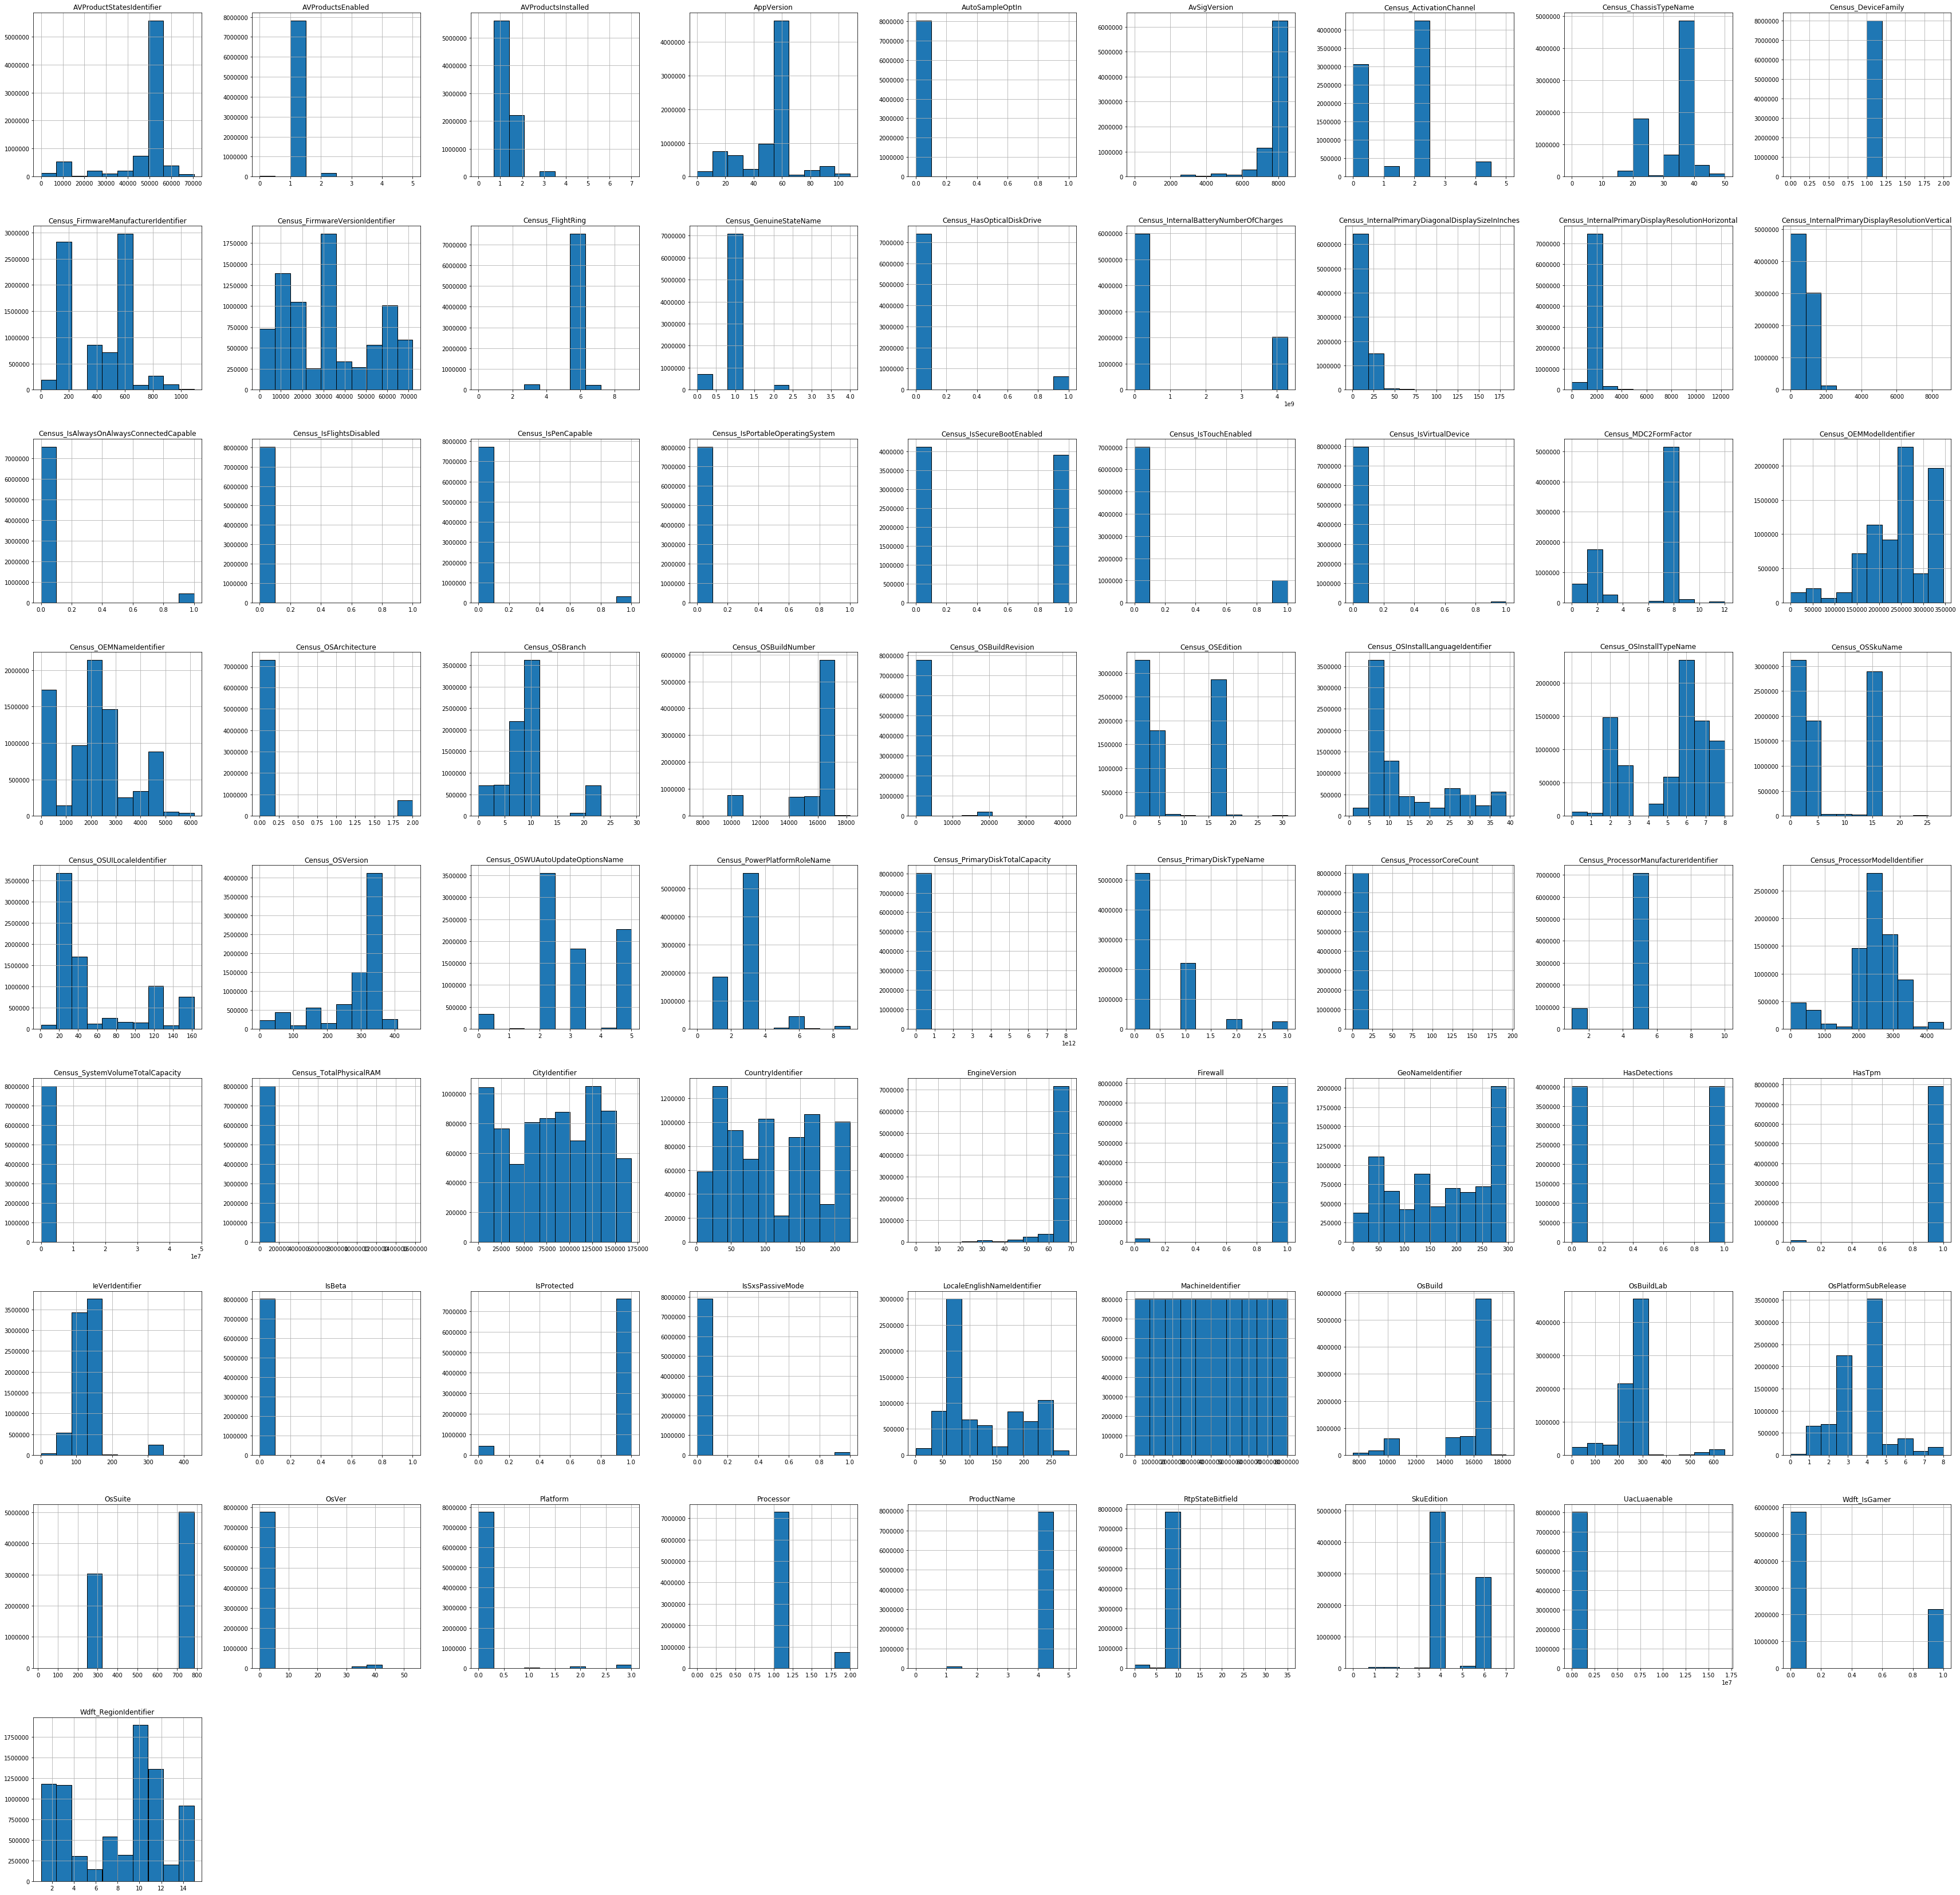

In [10]:
df.hist(figsize=(60,60), ec="k")

plt.tight_layout()
plt.show()